# Pediction using K-Means Clustering 

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid. 

In [12]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

#importing the Iris dataset with pandas
data = pd.read_csv('IRIS.csv')

In [13]:
species = {'Iris-setosa': 1,'Iris-versicolor': 2, 'Iris-virginica': 3} 
data.species = [species[item] for item in data.species] 
print(data) 

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


## Dividing the dataset into features and target columns

In [14]:
X=data.iloc[:,:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = data.iloc[:,-1:]
y.head()

,species
0,1
1,1
2,1
3,1
4,1


**Data Preprocessing**

In [16]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [17]:
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

Spliting the dataset

In [18]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
y_test.shape

(45, 1)

Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. although we already know the answer is 3 it is still interesting to run.

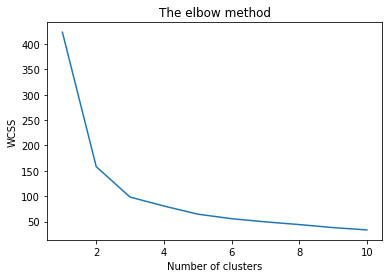

In [20]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train,y_train)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.
taking k = 3 accordingly

In [21]:
#Training and Predicting
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


**Checking the Accuracy**

In [22]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.9777777777777777

**Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm
cm1 = pd.DataFrame(data=cm,index=['setosa','Versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
Versicolor,0,18,0
virginica,0,1,12


In [24]:
#output visualization
prediction_output =pd.DataFrame(data=[y_test.values,ypredict],index=['y_test','ypredict'])

/usr/local/lib/python3.6/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [25]:
prediction_output.transpose()

,y_test,ypredict
0,"[[1], [2], [2], [1], [3], [2], [3], [1], [1], ...","[1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, ..."


**To find the optimal value of K**

In [26]:
#Finding the values of k
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

In [27]:
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556]


In [28]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.9777777777777777 with k= 3


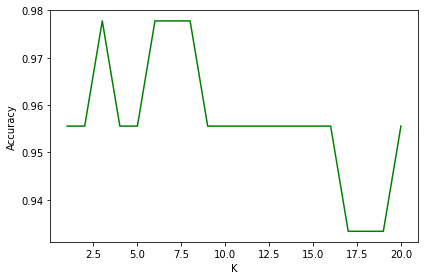

In [29]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

**Conclusion:**

We have sucessfully applied the KNN model on Iris Dataset the accuray we got is 97.77 % and the optimal value of K is 3